## Homework 03: The Adventure of the Missing Phenotype
##### By Kevin Liu

Lestrade et al. hypothesizes that knockout of the coriander gene in sand mice does not affect the expression levels of other genes, even though the sand mouse coriander gene supposedly encodes an important transcription factor.
We will begin by examining their raw data of expression levels per each replicate.

In [1]:
!head w03-data.tbl # examine the first few roaw of the raw data file.

# Supplementary Data Table 1
# From Lestrade et al., "The adventure of the missing phenotype", Sand Mouse Journal 1:3 (2022)
#
#                   wt     wt     wt     wt     wt     wt     wt     wt     wt     wt    mut    mut    mut    mut    mut    mut    mut    mut    mut    mut
# gene_name          M      M      M      F      F      M      M      F      F      F      F      M      M      M      F      F      F      F      M      M
anise             67.1   67.2   68.4   37.9   37.0   67.0   67.5   39.7   37.3   36.1   46.0   35.5   59.1   24.8   36.0   74.4   37.5   52.5   61.4   44.4
apricot           19.7   12.5   17.4   44.4   46.1   18.1   18.9   49.3   47.0   40.9   37.6   16.7   49.8   28.4   27.4   45.5   50.8   29.8   21.2   37.9
artichoke         66.0   65.3   63.2   39.2   40.6   64.4   64.7   38.2   41.0   39.7   57.2   67.4   34.7   60.3   51.4   71.3   67.4   46.4   41.9   40.4
arugula           72.0   76.3   78.5   46.5   48.2   77.2   76.8   47.1   45.3   49.2   52.1 

In [2]:
# import the libraries to be used.
import numpy as np
import pandas as pd
import seaborn as sns

#### 1. Downsample the data set by reservoir sampling

To prepare for subsequent analysis and visualization of the sand mouse gene expression data, we will define a random sampling function based on the reservior sampling algorithm and test it on the raw data.

In [3]:
# read in the raw data line by line and let each row of data be a list within a list.
data_list = []
for line in open('w03-data.tbl'):
    if line[0] == '#': continue
    line = line.rstrip('\n')
    fields = line.split()
    data_list.append(fields)

In [4]:
# define the random sampling function based on reservoir sampling.
def reservoir_sampling(lst, m):
    reservoir = [] # create a reservoir to hold m number of values.
    
    # append the first m values to the reservoir.
    for i in range(m):
        reservoir.append(lst[i])

    # append all values that come after element m into a list k.
    k = []
    for i in range(m, len(lst)):
        k.append(lst[i])

    for elem in k:
        r = np.random.randint(0, len(k)) # for each element between in k, generate a random index within the range of k indicies.
        
        # if the random element r in list k is within the range of indicies of the reservoir, change the corresponding element in the reservior to that element.
        if r <= m-1:
            reservoir[r] = elem
    return(reservoir) # return the randomly selected m samples.


reservoir_m10 = reservoir_sampling(data_list, 10) # test the algorithm by sampling m=10 rows od raw data.

samples_m10 = pd.DataFrame(reservoir_m10).set_index([0]).add_prefix('mouse_') # convert the list of lists to a Pandas dataframe and label each sand mouse replicate.
samples_m10

,mouse_1,mouse_2,mouse_3,mouse_4,mouse_5,mouse_6,mouse_7,mouse_8,mouse_9,mouse_10,mouse_11,mouse_12,mouse_13,mouse_14,mouse_15,mouse_16,mouse_17,mouse_18,mouse_19,mouse_20
0,,,,,,,,,,,,,,,,,,,,
PLCB3,25.5,25.7,27.5,59.8,54.5,27.7,27.7,54.4,58.0,54.4,29.4,33.6,14.8,36.7,64.0,29.7,49.2,34.2,57.2,40.8
RICTOR,36.1,35.6,32.1,62.5,66.7,31.4,40.1,60.1,63.9,66.1,52.6,46.0,49.6,58.8,85.4,60.0,51.4,52.0,37.8,33.7
artichoke,66.0,65.3,63.2,39.2,40.6,64.4,64.7,38.2,41.0,39.7,57.2,67.4,34.7,60.3,51.4,71.3,67.4,46.4,41.9,40.4
arugula,72.0,76.3,78.5,46.5,48.2,77.2,76.8,47.1,45.3,49.2,52.1,43.0,92.2,68.3,82.4,32.8,92.1,71.2,59.2,65.4
SIGMAR1,62.5,68.0,64.5,36.6,35.3,62.2,60.5,36.1,32.3,34.7,33.8,58.1,58.6,59.5,74.0,48.2,22.4,63.9,67.6,84.9
avocado,30.9,40.2,33.6,62.1,65.5,37.2,35.9,66.5,64.5,59.7,39.5,60.5,21.4,103.3,55.5,65.8,49.4,61.7,75.1,42.2
TAS2R60,38.9,45.2,43.4,69.3,68.4,41.4,46.0,71.8,70.9,67.3,57.0,55.5,71.6,59.4,54.3,48.1,64.6,78.0,66.4,36.2
basil,44.5,47.6,47.2,70.6,71.3,44.4,41.6,74.5,69.2,75.8,81.2,72.4,72.9,47.6,69.3,53.2,66.6,36.8,69.4,58.1
ATP5L,23.2,25.0,22.9,53.1,50.7,26.0,24.5,53.1,50.0,52.4,51.6,47.0,35.2,43.6,43.4,23.9,55.5,35.0,55.2,12.0


#### 2. Look at outliers; validate the formatting; and clean the data

Before performing any analysis and visualization, we will examine the raw data to check for any outliers and invalid data.
Based on our first look at the raw data, we know that the first three rows are comments and should be removed before reading it in for further wrangling. Furthermore, we notice that the gene names and sex row names are also commented using a '#', so we will fix these labels before loading the data.

In [5]:
!cat w03-data.tbl | sed '1,3d' | sed 's/# gene_name/sex/' | sed 's/#/genotype/' > 'w03-data-renamed.tbl' # remove first three comment lines and fix the gene name and sex row names, then write out the new data file.

In [6]:
data_df = pd.read_table('w03-data-renamed.tbl', delim_whitespace = True, comment = '#', header = None, na_values = 'n.d.', index_col = 0).add_prefix('mouse_').T # read in the new data into a Pandas dataframe, label each of the sand mouse replicates, and transpose the data.
data_df[data_df.columns[2:]] = data_df[data_df.columns[2:]].apply(pd.to_numeric) # change the data type of the numeric columns to the correct specification.
data_df.head() # examine the first few rows of data.

,genotype,sex,anise,apricot,artichoke,arugula,asparagus,avocado,banana,basil,...,AC007325.4,AC007325.2,BX072566.1,AL354822.1,AC023491.2,AC004556.1,AC233755.2,AC233755.1,AC240274.1,AC213203.1
mouse_1,wt,M,67.1,19.7,66.0,72.0,76.4,30.9,87.8,44.5,...,58.4,70.3,43.6,79.3,59.2,72.6,47.9,14.7,77.8,54.0
mouse_2,wt,M,67.2,12.5,65.3,76.3,77.3,40.2,82.9,47.6,...,60.3,66.4,44.5,73.4,56.7,72.5,51.6,14.1,78.6,55.4
mouse_3,wt,M,68.4,17.4,63.2,78.5,72.8,33.6,83.9,47.2,...,60.1,69.8,40.7,79.8,57.4,70.7,56.9,15.5,76.2,56.8
mouse_4,wt,F,37.9,44.4,39.2,46.5,47.4,62.1,55.0,70.6,...,31.8,38.1,70.4,44.9,29.9,45.6,74.2,46.1,45.4,25.6
mouse_5,wt,F,37.0,46.1,40.6,48.2,43.0,65.5,59.8,71.3,...,30.8,37.2,72.6,46.4,30.5,43.8,77.9,44.0,51.3,27.5


After fixing the raw data for reading into a Pandas dataframe, we examine the data and notice that it is in wide format. We will pivot the data to long format to create fully tidy data for analysis and visualization.

In [7]:
resetidx_df = data_df.reset_index() # reset the index for the dataframe for pivoting from wide to long data format.
melt_df = resetidx_df.melt(id_vars = resetidx_df.columns[0:3], value_vars = resetidx_df.columns[3:], value_name = 'TPM', var_name = 'gene').set_index('index') # pivot the wide data into long data format.
melt_df['TPM'] = melt_df['TPM'].astype(float) # convert the column of expression level (TPM) to numeric type.
melt_df.head() # examine the first few rows of data.

,genotype,sex,gene,TPM
index,,,,
mouse_1,wt,M,anise,67.1
mouse_2,wt,M,anise,67.2
mouse_3,wt,M,anise,68.4
mouse_4,wt,F,anise,37.9
mouse_5,wt,F,anise,37.0


To perform quality assessment and control of our data, we will examine the maximum and minimum TPM values to check for any potential bad data. We will also see if there is any missing data (NaNs) within our dataset.

In [8]:
max_tpm = melt_df.sort_values(by = 'TPM', ascending = False)[0:1] # sort the long data by TPM to get the maximum value.
data_df[max_tpm['gene']].T # examine the identified gene with the maximum TPM in the raw data as we loaded in earlier.

,mouse_1,mouse_2,mouse_3,mouse_4,mouse_5,mouse_6,mouse_7,mouse_8,mouse_9,mouse_10,mouse_11,mouse_12,mouse_13,mouse_14,mouse_15,mouse_16,mouse_17,mouse_18,mouse_19,mouse_20
0,,,,,,,,,,,,,,,,,,,,
HSH2D,53.5,53.5,57.3,82.9,83.3,61.2,52.6,85.8,86.0,80.9,63.4,64.7,125.5,84.8,69.8,56.9,65.2,55.7,96.9,81.8


In [9]:
min_tpm = melt_df.sort_values(by = 'TPM', ascending = True) # sort the long data by TPM and identify the minimum values.
min_tpm = min_tpm[min_tpm['TPM'] == list(min_tpm['TPM'][0:1])[0]] # get all rows of data that have the identified minimum value.
min_tpm_lst = min_tpm['gene'].tolist() # put the gene names of all data that contain this minimum value into a list.

# long data format may result in duplicate gene names if there are multiple TPM values from the same gene that match the identified minimum.
# get a unique list of gene names that match the minimum value.
min_tpm_genes = []
for elem in min_tpm_lst:
    if elem not in min_tpm_genes:
        min_tpm_genes.append(elem)

data_df[min_tpm_genes].T.head() # examine the identified genes with the minimum TPM in the raw data as we loaded in earlier.

,mouse_1,mouse_2,mouse_3,mouse_4,mouse_5,mouse_6,mouse_7,mouse_8,mouse_9,mouse_10,mouse_11,mouse_12,mouse_13,mouse_14,mouse_15,mouse_16,mouse_17,mouse_18,mouse_19,mouse_20
0,,,,,,,,,,,,,,,,,,,,
CCDC186,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
OAT,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
GFOD1,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
FP325331.1,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
CDR1,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0


In [10]:
melt_df['TPM'].isna().sum() # count how many missing values (NaNs) there are in the data.

380

In [11]:
nan_cols = data_df.columns[data_df.isna().any()].to_list() # get indicies for lines that have NaNs.
print('The lines of data that have NaN values are:', ', '.join(nan_cols), '.\n')

neg_cols = data_df.select_dtypes("number").columns[(data_df.select_dtypes("number") < 0).any()].to_list() # get indicies for lines that have negative values.
print('The lines of data that have negative TPM values are:', ', '.join(neg_cols), '.\n')

clean_df = data_df.drop(nan_cols + neg_cols, axis = 1, inplace = False) # remove the bad data from the loaded raw data.

print('The data frame now has', len(clean_df.columns), 'columns remaining.\n')
print('A total of', len(nan_cols + neg_cols), 'columns were dropped;', len(nan_cols), 'were columns with NaNs and', len(neg_cols), 'were columns with negative TPMs.')

The lines of data that have NaN values are: MRTO4, C1orf145, SNRK, CPLX1, NOCT, BTN3A1, FAM189A2, ST3GAL4, SPAG6, WSCD2, SEC23A, PIGB, RP11-697E2.6, RAD21L1, COX4I2, SIN3B, RBMY1J, ASCC2, KRTAP13-2 .

The lines of data that have negative TPM values are: blackberry, ZNF514, RPUSD3, EIF1B, SRFBP1, GFOD1, HIST1H2BA, TPBG, CDR1, VAMP7, WDYHV1, TEK, C1QTNF4, NARS2, CXCR5, CCDC186, OAT, CYP2E1, THOP1, CTD-2568A17.1, FP325331.1 .

The data frame now has 19993 columns remaining.

A total of 40 columns were dropped; 19 were columns with NaNs and 21 were columns with negative TPMs.


Based on the above process, we found that the raw data contains several rows of data that are likely to be artifacts or bad data. Specifically, we found multiple rows of data that contain values full of -999.0 TPM expression levels and multiple rows that contain missing data (NaNs). We will remove these lines of data to create the cleaned data.

#### 3. Tidy the data

In [12]:
cleanidx_df = clean_df.reset_index() # reset the dataframe index for pivoting to long data format.
clean_melt_df = cleanidx_df.melt(id_vars = cleanidx_df.columns[0:3], value_vars = cleanidx_df.columns[3:], value_name = 'TPM', var_name = 'gene').set_index('index') # pivot the cleaned raw data from wide to long data format.
clean_melt_df.to_csv('w03-data-tidy-LiuKevin.csv', index = False) # write out the fully tidy data into a csv file.

To create fully tidy data, we will need to convert the cleaned data from wide format into long format by pivoting. Then, we can write out the fully tidy data as a csv file for further analysis and visualization.

#### 4. Visualize the data and explain your conclusions

In attempt to assess the hypothesis by Lestrade et al., we will visualize the gene expression levels through swarm plots of 10 randomly sampled genes using our reservoir sampling algorithm and compare it to the coriander gene expression levels.

In [13]:
tidy_df = pd.read_csv('w03-data-tidy-LiuKevin.csv') # read in the tidied data from before.
tidy_df.head() # examine the first few rows.

,genotype,sex,gene,TPM
0,wt,M,anise,67.1
1,wt,M,anise,67.2
2,wt,M,anise,68.4
3,wt,F,anise,37.9
4,wt,F,anise,37.0


In [14]:
tidy_cols = tidy_df['gene'].to_list() # get a list of gene names for random sampling.

# create a list of gene names that are unique.
tidy_lst = []
for elem in tidy_cols:
    if elem not in tidy_lst:
        tidy_lst.append(elem)

gene_sample = reservoir_sampling(tidy_lst, 10) # randomly sample 10 genes using the reservior sampling algorithm.

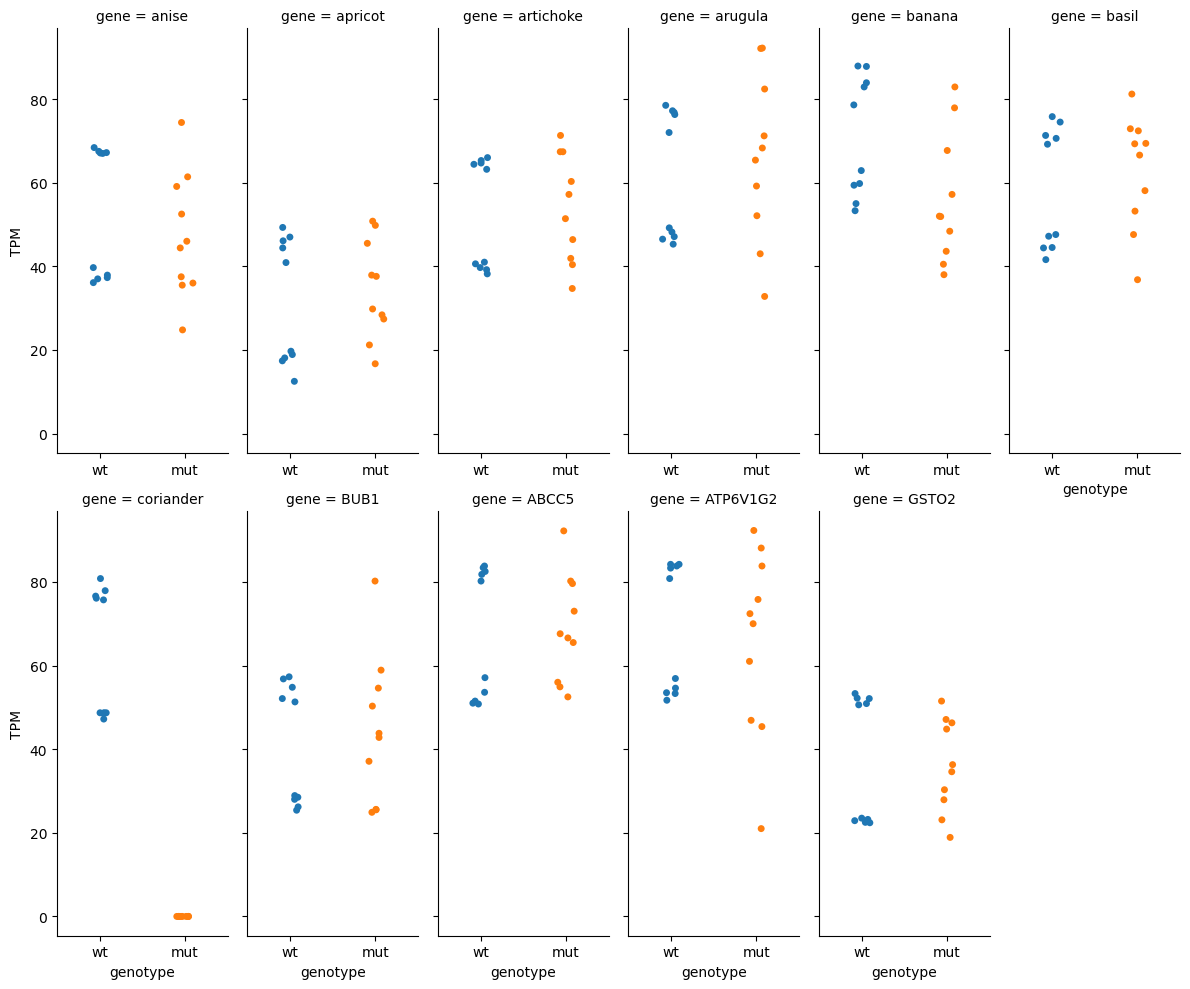

In [15]:
tidy_select_df = tidy_df.loc[tidy_df['gene'].isin(gene_sample + ['coriander'])] # filter the data to keep only the 10 randomly sampled genes and the coriander gene.

# plot the randomly sampled gene expression data as swarm plots.
g = sns.catplot(data = tidy_select_df, x = "genotype", y = "TPM", hue = "genotype", col = "gene", col_wrap = 6, aspect = 0.4)
for ax in g.axes:
    ax.tick_params(labelbottom=True)

Based on the above plot, we find that the coriander gene knockouts have 0 TPM expresion levels as expected and that the other 10 randomly sampled genes do not seem to differ by genotype, which supports the original hypothesis by Lestrade et al. that knockout of the coriander gene does not affect the expression of other sand mouse genes.

However, we observe an interesting clustering of expression levels in the wild-type sand mouse genes. Since we know that we have the sex data of the mouse replicates, we then hypothesize that there might be sex-dependent changes in the expression levels of genes in the coriander kockout sand mouse. We will assess this hypothesis through another plot.

In [21]:
# plot the randomly sampled gene expression data as swarm plots.
g = sns.catplot(data = tidy_select_df, x = "genotype", y = "TPM", hue = "sex", col = "gene", col_wrap = 6, aspect = 0.4)
for ax in g.axes:
    ax.tick_params(labelbottom=True)

After examining our above plot, we find that the results support our new hypothesis that kockout of the coriander gene does affect the expression levels of other sand mouse genes by the sex of the sand mouse. Specifically, we observe in the wild-type sand mouse gene expression levels that males and females have differential expression levels of each gene. However, these differences in gene expression that are sex-dependent are no longer observable after the knockout of the coriander gene.

We can further verify these findings in those genes that have been previously believed to be direct targets of the coriander transcription factor: Arugula, Cayenne, Juniper, and Yam.

In [19]:
tidy_select_direct_df = tidy_df.loc[tidy_df['gene'].isin(['arugula', 'cayenne', 'juniper', 'yam', 'coriander'])] # filter the data to keep only the 10 randomly sampled genes and the coriander gene.

# plot the randomly sampled gene expression data as swarm plots.
g1 = sns.catplot(data = tidy_select_direct_df, x = "genotype", y = "TPM", hue = "sex", col = "gene", col_wrap = 6, aspect = 0.4)
for ax in g1.axes:
    ax.tick_params(labelbottom=True)

In [20]:
# plot the randomly sampled gene expression data as boxplots.
g1 = sns.catplot(data = tidy_select_direct_df, x = "genotype", y = "TPM", hue = "genotype", col = "gene", kind = "box", col_wrap = 6, aspect = 0.4)
for ax in g1.axes:
    ax.tick_params(labelbottom=True)

Our findings suggest that knockout of the sand mouse coriander gene affects the expression of other sand mouse genes that exhibit sex-dependent expression. Therefore, these results contradict the hypothesis by Lestrade et al. and their subsequent conclusions based on this original hypothesis should be interpreted with causion. These conclusions were likely a result of Lestrade et al. using boxplots to visualize their data without explicitly plotting the individual datapoints, which resulted in the masking of these distinguished clusters associated with sex differences.